# COGS 108 - Final Project

## Important

- ONE, and only one, member of your group should upload this notebook to TritonED. 
- Each member of the group will receive the same grade on this assignment. 
- Keep the file name the same: submit the file 'FinalProject.ipynb'.
- Only upload the .ipynb file to TED, do not upload any associted data. Make sure that for cells in which you want graders to see output that these cells have been executed.

## Group Members: Fill in the Student IDs of each group member here

Replace the lines below to list each persons full student ID, ucsd email and full name.

- A12170444, dylew@ucsd.edu, Daniel Lew
- A13107276, e3pineda@ucsd.edu, Elimelec Pineda 
- A12678538, jshi@ucsd.edu, Jamie Shi

## Introduction and Background

ELO is a system designed to calculate the relative skill level of players or teams in competitions, and is used to help predict the outcome of a match. These ratings constantly change as more games are played, and calculate a team's win percentage. 

*practicallypredictable*, a sports analytics site, provides additional information about this topic by analyzing different factors affecting ELO, such as ratings over time, strength of schedule, and team matchups. As a season progresses, rosters may change as a result of player injuries, which can affect a team's ELO depending on the level of impact that injured player had on the team. *practicallypredictable* also incorporates strength of schedule in ELO to demonstrate that teams with more wins in more difficult schedules throughout the season are more likely to have higher ELOs than teams with more wins in weaker schedules. In addition, team matchups can affect ELO due to upsets, in which the less favored team defeats the statistically stronger team. This unpredictable outcome heavily sways a team's rating to a greater value, which can lead to higher chances of winning more games.

In the context of the NBA, the average ELO hovers at around 1500. In one of its [articles](https://fivethirtyeight.com/features/how-we-calculate-nba-elo-ratings/?fbclid=IwAR08nfRrzwBOP5yNaxZe4qdc0C4kPl3Tb7v0XXLoVQ6B5f43ajgNJbzU6PU), FiveThirtyEight includes a table that highlights the approximate benchmarks for various ELO ratings:

<!-- 
Previous intro

    ELO statistics is a system designed to calculate the relative skill levels of players or teams in competition, and used as a predictor for an outcome of a match. These ratings are constantly changing as more games are played and calculate a team's winning percentage based on their winning record. We wanted to study if ELO ratings for an NBA team during one season can help predict their win percentage in following seasons. 

    According to practicallypredictable, they analyze different factors that affect an ELO stat, such as ratings over time, strength of schedule, and team matchups. As a season progresses, rosters may adjust due to a player becoming injured, which could affect a team's ELO statistic depending on the impact that injured player had on the team's winning percentage. They incorporated strenghth of schedule in ELO stats to demonstrate that teams with wins in more difficult schedules throughout the season are more likely to have higher ELO's than teams with weaker schedules. Finally, team matchups can also affect the ELO ratings due to an upset, which means a less favored team beating a stronger team based on stats. This unpredictable outcome heavily sways a team's rating to a higher number, which could lead to higher chances of winning more games.

    As discussed previously, it’s clear that higher ELO is correlated with getting more wins. Yet, depending on whether it is the regular season or playoffs, this condition may overestimate or underestimate a team’s probability of winning. For example, in the regular season, stronger teams such as the 2018 Golden State Warriors would “coast,” or play with less effort, and lose meaningless games they should have won. Going by Elo rating, 538 gives Golden State just a 14% chance of winning another championship in 2019. This model under-rates Golden State’s ability to win games that matter, as the team is known to pick up the pace in April and dominate the playoffs. -->

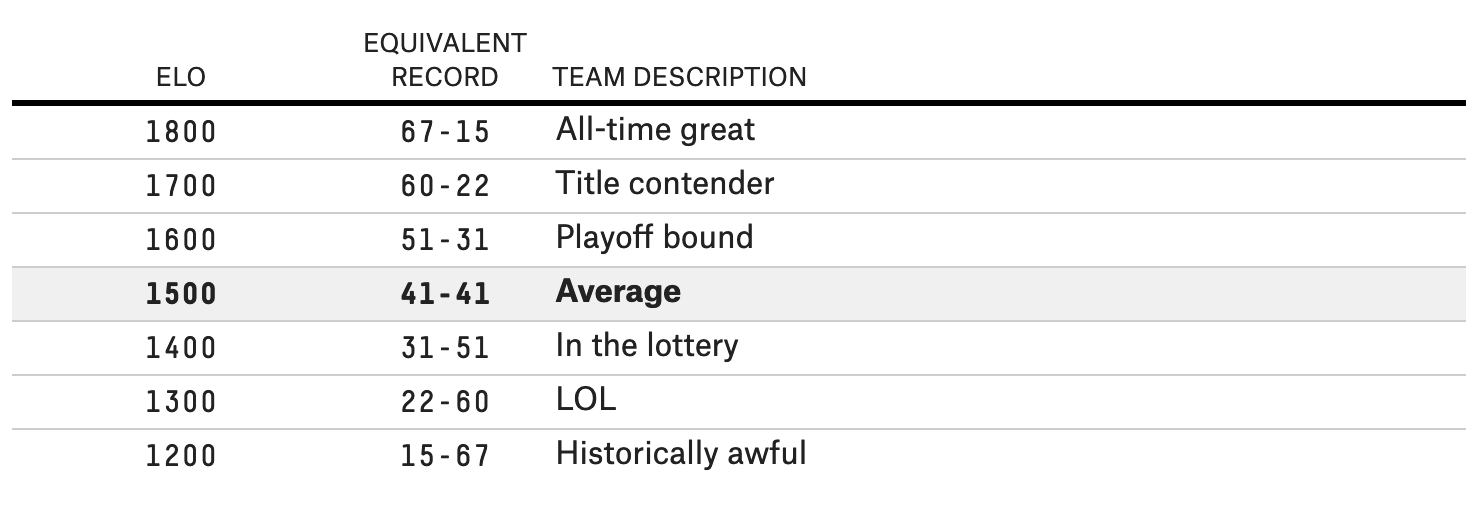

In [1]:
from IPython.display import Image
from IPython.display import Markdown as md
Image("img/eloTable.png")

The table above conveys the idea that teams whose ELO ratings differ by just 100 points can have noticeably different win records. Another detail to note is that 75% of a team's ELO carries over to the subsequent NBA season. As explained by FiveThirtyEight, if a team ends a season with an ELO of 1754, then it will start the next season with an ELO of (.75 \* 1754) + (.25 \* 1505) = 1692, with the 1505 representing the long-term ELO rating, slightly above the standard 1500 to account for expansion teams. 

ELO can be used to see whether certain NBA teams are more successful than others, over the span of their existence. It can also be used to help predict how likely a team is to win the next NBA championship. However, how significant does ELO for each team change from one year to the next? From one decade to the next? We will observe and analyze how ELO for NBA teams rise and decay over time. 

## Description of the Data

The data that will be used for analysis comes from Kaggle, hosted by FiveThirtyEight through their [GitHub](https://github.com/fivethirtyeight/data/tree/master/nba-elo). It contains 23 columns and 120,890 rows, and comprises NBA game statistics including but not limited to game results, game locations, years, team, and opponent ELO. This information enables us to more closely observe teams' ELO throughout their active years.

## Cleaning the Data

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#uncomment imports below if you need them
#import nltk
#from nltk.tokenize import word_tokenize
#from nltk.corpus import stopwords

#from sklearn.svm import SVC
#from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#from sklearn.metrics import classification_report, precision_recall_fscore_support

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [3]:
# Save the data
eloDf = pd.read_csv('nbaallelo.csv')

In [4]:
# Look at the data
eloDf.head(5)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


As seen in the first five rows, the data already contains standardized versions of important columns such as team name, opponent name, game season, game location, and game result. We will also check to see whether the data contains any missing values.

In [5]:
# Check for any missing data
eloDf.isnull().sum()

gameorder             0
game_id               0
lg_id                 0
_iscopy               0
year_id               0
date_game             0
seasongame            0
is_playoffs           0
team_id               0
fran_id               0
pts                   0
elo_i                 0
elo_n                 0
win_equiv             0
opp_id                0
opp_fran              0
opp_pts               0
opp_elo_i             0
opp_elo_n             0
game_location         0
game_result           0
forecast              0
notes            120890
dtype: int64

The only column with missing data was under notes; however, we do not plan to use this observation. Since the other columns contain no missing values, we conclude that the data is clean.

In [6]:
# Drop columns we don't need
eloDf.drop(['game_id','lg_id','date_game','seasongame','gameorder','is_playoffs','pts','opp_pts','fran_id','opp_fran','game_location','notes'], axis=1, inplace=True)

We removed several columns that we believe will not be revelant in our analysis, so as to make the data frame easier to read. Columns that are kept either have revelancy to our hypothesis, or can be used for benchmark comparisons.

## Analysis of the Data

In [7]:
# Only take teams that played in last 30 years
df = eloDf[eloDf['year_id'] > 1984]
df.head()

,_iscopy,year_id,team_id,elo_i,elo_n,win_equiv,opp_id,opp_elo_i,opp_elo_n,game_result,forecast
51630,1,1985,WSB,1455.0490,1442.1162,34.773190,CHI,1377.2302,1390.1630,L,0.468122
51631,0,1985,CHI,1377.2302,1390.1630,29.584490,WSB,1455.0490,1442.1162,W,0.531878
51632,1,1985,BOS,1643.8761,1653.2661,56.125080,DET,1574.7426,1565.3525,W,0.455696
51633,0,1985,DET,1574.7426,1565.3525,47.593834,BOS,1643.8761,1653.2661,L,0.544304
51634,0,1985,GSW,1453.0502,1443.4432,34.909248,PHO,1537.4418,1547.0487,L,0.522447


First, we made another data frame that only looks at the games played in the last thirty years. This will make  yearly comparisons easier to do between teams. Since the data only went as far as 2015, we only took games starting at 1985.

In [8]:
# Find team IDs
uniqueTeams = df.team_id.unique()
print(uniqueTeams)
print(uniqueTeams.size)

['WSB' 'CHI' 'BOS' 'DET' 'GSW' 'PHO' 'ATL' 'NJN' 'PHI' 'CLE' 'UTA' 'SEA'
 'HOU' 'DAL' 'DEN' 'IND' 'KCK' 'POR' 'MIL' 'NYK' 'SAS' 'LAL' 'LAC' 'SAC'
 'CHH' 'MIA' 'MIN' 'ORL' 'VAN' 'TOR' 'WAS' 'MEM' 'NOH' 'CHA' 'NOK' 'OKC'
 'BRK' 'NOP' 'CHO']
39


Next, we looked at the unique teams that existed in our data. This gave us a visualization of the teams, and provided us with markers for each team name.

In [9]:
# Drop teams that haven't played at least 30 NBA seasons
for team in uniqueTeams:
    yearsPlayed = df.loc[df['team_id'] == team].year_id.unique().size
    if yearsPlayed < 30:
        df = df.drop(df[df.team_id == team].index)

uniqueTeams = df.team_id.unique()
uniqueTeams.size

20

In [10]:
print(uniqueTeams)

['CHI' 'BOS' 'DET' 'GSW' 'PHO' 'ATL' 'PHI' 'CLE' 'UTA' 'HOU' 'DAL' 'DEN'
 'IND' 'POR' 'MIL' 'NYK' 'SAS' 'LAL' 'LAC' 'SAC']


To make sure that comparisons are fair, we further reduced teams to those that played at least thirty NBA seasons, to ensure that we don't analyze teams that have played too few games within our timeframe.

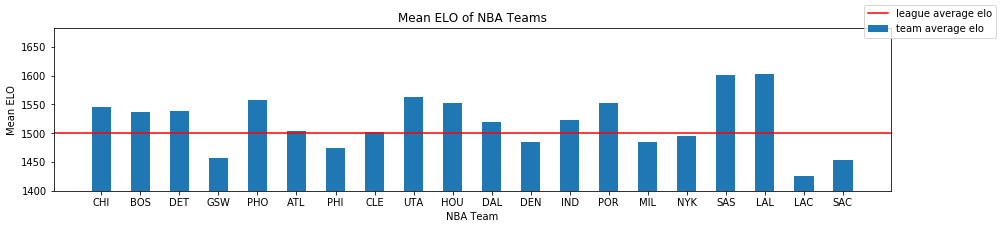

In [17]:
# Calculate the mean ELO of each NBA team over the past thirty years
meanTeamEloRatings = []
for team in uniqueTeams:
    meanTeamEloRatings.append(df.loc[df['team_id'] == team].elo_n.mean())

ax = plt.figure(figsize=(15, 3))
plt.bar(uniqueTeams, meanTeamEloRatings, width=0.5, label='team average elo')
plt.xlabel('NBA Team')
plt.ylabel('Mean ELO')
plt.title('Mean ELO of NBA Teams')
plt.axhline(y=1500, color='r', linestyle='-', label='league average elo')
ax.legend()

# Set ymin to 1400 to more clearly show differences in mean ELO between various teams
plt.ylim(bottom=1400) 
plt.show()

The bar graph above doesn't show the changes of ELO over time, but rather serves as an introduction to observing the ELO of various NBA teams. It gives us a glimpse of which teams are generally weaker or stronger than their average competition. 

When we calculate the mean ELO of NBA teams over all the years they have been active, we see that certain teams, most noticeably the Los Angeles Lakers (LAL) and San Antonio Spurs (SAS), stand out in terms of having higher mean ELO. Hence, compared to the rest of the league, the Lakers and Spurs have as a whole won a large percentage of their games, which contributes to them being seen as some of the more successful NBA teams in the long run. The Golden State Warriors (GSW), despite being one of the most dominant teams today, has historically been relatively weak, achieving a below average win percentage. 

In [14]:
def plotElo(teams, colors=None):
    ''' 
    Creates a line plot displaying the ELO trends of the specified NBA teams
    
    :param teams: An array of strings, each string representing a team name
                  i.e. ['GSW', 'LAL']
    :param colors: An array of strings, each string representing the color
                   associated with a team
                   i.e. ['orange', 'purple']
    '''

    allTeamDataFrames = []
    # Extract ELO data from each team
    for team in teams:
        team = df.loc[eloDf['team_id'] == team]
        activeYears = team.year_id.unique()
        eloData = []
        # Get mean ELO of each year for the current team
        for year in activeYears:
            meanEloThisYear = team.loc[eloDf['year_id'] == year].elo_n.mean()
            eloData.append(meanEloThisYear)
        currDf = pd.DataFrame(eloData, columns=['meanElo'], index=activeYears)
        allTeamDataFrames.append(currDf)
    updatedDf = pd.concat(allTeamDataFrames, ignore_index=True, axis=1)
    updatedDf.columns = teams

    stringifiedTeam = ', '.join(teams )
    if colors == None:
        updatedDf.plot(kind='line', title='ELO for ' + stringifiedTeam + ' over time')  
    else:
        updatedDf.plot(kind='line', title='ELO for ' + stringifiedTeam + ' over time', color=colors)

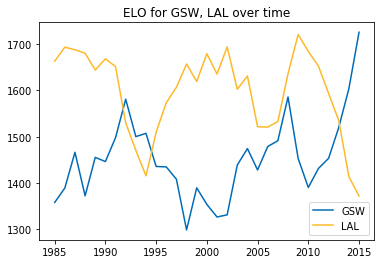

In [15]:
plotElo(['GSW', 'LAL'], ['#006BB6', '#FDB927'])

We then took two teams in our time frame, the Golden State Warriors (GSW) and Los Angeles Lakers (LAL), and compared their average ELO through the last 30 years. The plot displays the trend that when one team has high ELO, the other team has low ELO. The highs for Golden State are also noticeably less high than those for the Lakers, suggesting that over the past few decades, the Lakers' have as a whole enjoyed greater peaks of success than Golden State. However, it is also important to note that our data does not include games from more recent years (specifically 2016, 2017, and 2018), in which Golden State broke the regular season win record with a 73-9 season, and won two additional championships. The inclusion of this additional data would likely show that Golden State's peak ELO is higher than that of the Lakers, especially with Golden State currently having one of the most talented rosters of all time.

In [13]:
df.head()

,_iscopy,year_id,team_id,elo_i,elo_n,win_equiv,opp_id,opp_elo_i,opp_elo_n,game_result,forecast
51631,0,1985,CHI,1377.2302,1390.1630,29.584490,WSB,1455.0490,1442.1162,W,0.531878
51632,1,1985,BOS,1643.8761,1653.2661,56.125080,DET,1574.7426,1565.3525,W,0.455696
51633,0,1985,DET,1574.7426,1565.3525,47.593834,BOS,1643.8761,1653.2661,L,0.544304
51634,0,1985,GSW,1453.0502,1443.4432,34.909248,PHO,1537.4418,1547.0487,L,0.522447
51635,1,1985,PHO,1537.4418,1547.0487,45.710697,GSW,1453.0502,1443.4432,W,0.477553


## Results

(TBD)
(check if highest average ELO of year won)*
(change avg ELO to last elo?)*
(compare begining and midseason ELO)
(compare ELos of previous and next year)
(compare ELOs of previous 5 and next 5 years)
(compare ELOs of previous 10 and next 10 years)
(compare changes of ELOs)
(spread the analysis to remaining 19 teams)

## Privacy and Ethics

We have permission to use this dataset as the TAs have already approved of this usage as well as it being released to github and other open sources. This data does not violate any privacy matters as it only displays the numerical statistics of a team without revealing any personal information. Our data also includes all of the teams in the NBA, so there are not any potential biases regarding any exclusion of certain teams. 

## Conclusion

(TBD)